In [2]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle

In [3]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [4]:
#data = ert.load(dir+"res2dinv_inputs/amphibious_ERT_eastern_transect2_gps.Dat")
data = ert.load(dir+"res2dinv_inputs/ERT_western_perpendicular_gps.Dat")
data

20/12/24 - 15:12:52 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


Data: Sensors: 48 data: 565, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']

20/12/24 - 15:12:54 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (2.8s x 4): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\3218854033757721306
20/12/24 - 15:12:54 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 4): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\2678959599470936472


565 [31.57943488532237,...,30.390972206649042]

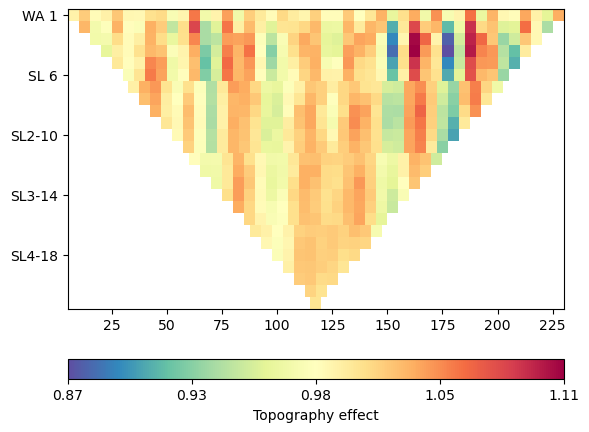

In [5]:
data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data['k'] = ert.createGeometricFactors(data, numerical=True)
mgr = ert.ERTManager(data)
k0 = ert.createGeometricFactors(data)
ert.showData(data, vals=k0/data['k'], label='Topography effect')
data
data['k']

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2bf7d4822d0>)

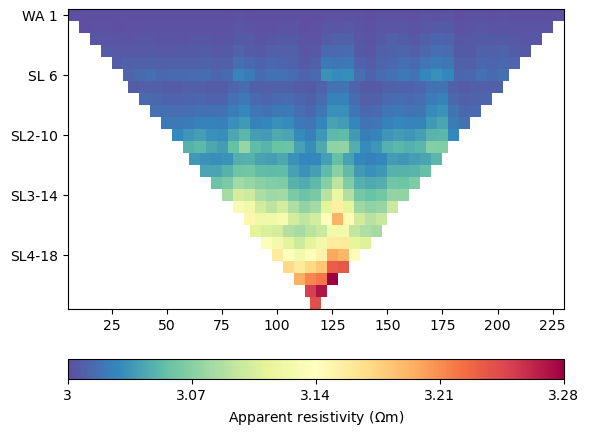

In [6]:
data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err']*100)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x228c4300c10>)

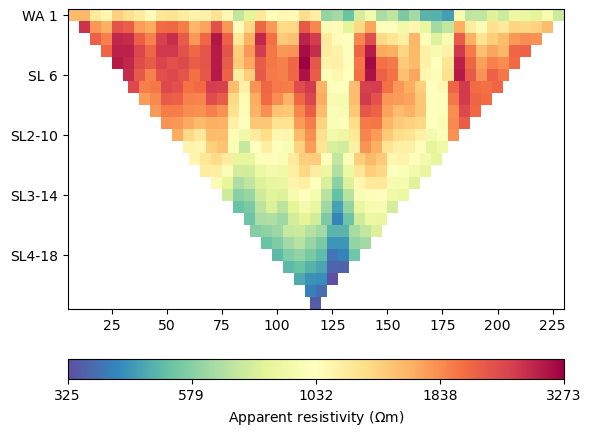

In [6]:
ert.showData(data)

20/12/24 - 15:29:01 - pyGIMLi - INFO - Use median(data values)=1291.2
20/12/24 - 15:29:01 - pyGIMLi - INFO - Created startmodel from forward operator: 962, min/max=1291.200000/1291.200000


20/12/24 - 15:29:01 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF7CFD26B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF7CFD2A20>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BF7D3E7290>
min/max (data): 325/3273
min/max (error): 3%/3.28%
min/max (start model): 1291/1291
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  259.12
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   89.08 (dPhi = 64.78%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   58.33 (dPhi = 33.76%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   32.23 (dPhi = 42.51%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    9.14 (dPhi = 63.20%) la

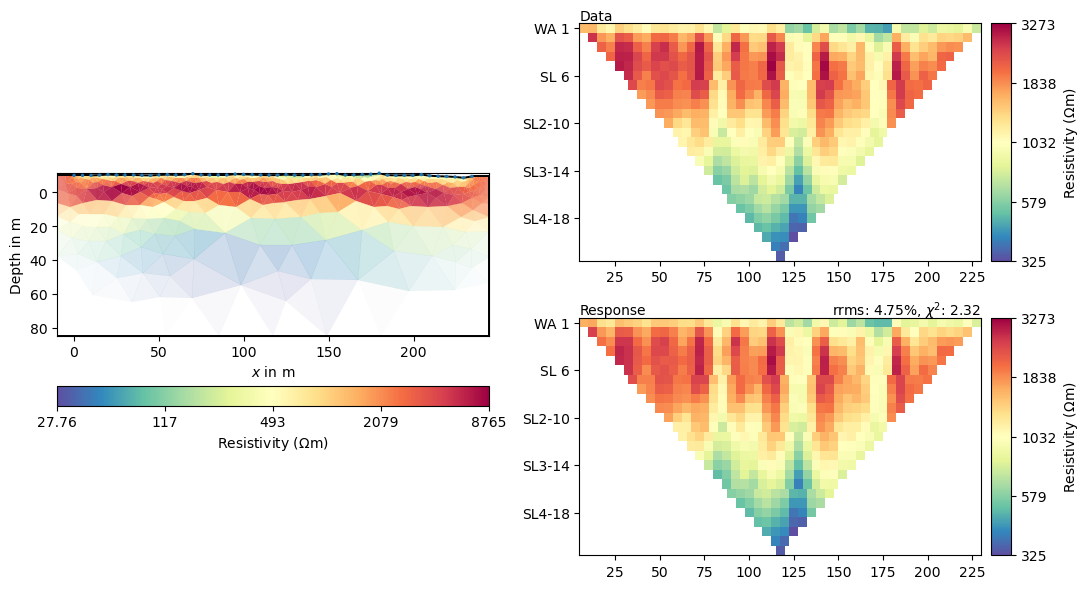

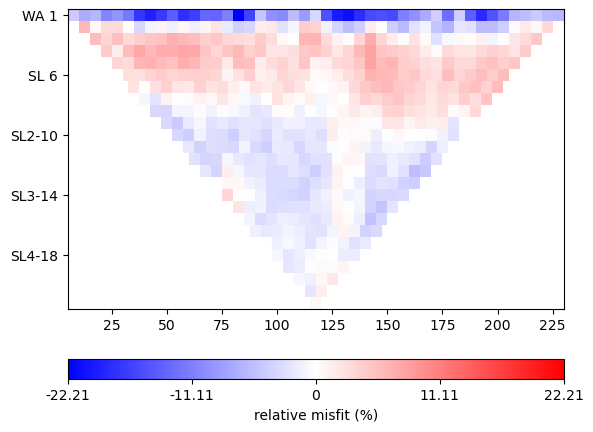

In [8]:
mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=100, zWeight=0.2)

mgr.showResultAndFit()
mgr.showMisfit()

0 -10.0 10.0191651 0.0
1 -10.0 -84.27678997528106 0.0
2 244.22959424427643 -84.27678997528106 0.0
3 244.22959424427643 9.415047722429518 0.0
4 -946.9183769771057 10.0191651 0.0
5 -946.9183769771057 -1020.5910495748162 0.0
6 1181.1479712213822 9.415047722429518 0.0
7 1181.1479712213822 -1021.1951669523867 0.0
8 0.0 10.0191651 0.0
9 1.25 10.0191651 0.0
10 3.75 10.0191651 0.0
11 5.0 10.0191651 0.0
12 6.25 10.0191651 0.0
13 8.75 10.0191651 0.0
14 10.0 10.0191651 0.0
15 11.249572297057824 10.051861803589661 0.0
16 13.748716891173476 10.117255210768983 0.0
17 14.9982891882313 10.149951914358644 0.0
18 16.24525524588322 10.236984309807394 0.0
19 18.739187361187067 10.411049100704892 0.0
20 19.986153418838988 10.498081496153642 0.0
21 21.234439955816587 10.43314758389968 0.0
22 23.731013029771784 10.303279759391758 0.0
23 24.979299566749383 10.238345847137797 0.0
24 26.229292478397305 10.238074892853348 0.0
25 28.72927830169315 10.23753298428445 0.0
26 29.97927121334107 10.23726203 0.0
27 31.2

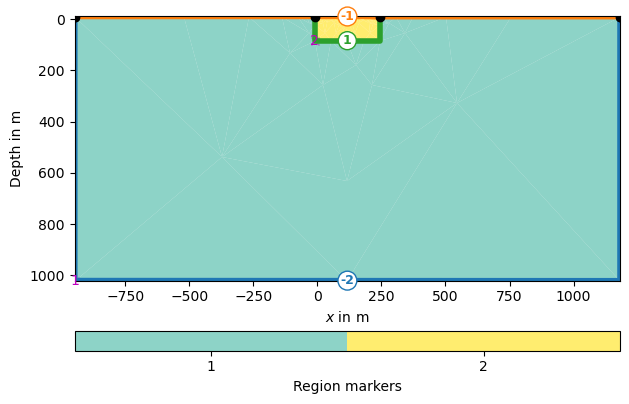

In [10]:
plc = mt.createParaMeshPLC(data,paraDX = 0.25, paraDZ= 0.25)
for i, n in enumerate(plc.nodes()[:]):
    #ax.text(n.x(), n.y(), str(i))
    print(i, n.x(), n.y(), n.z())
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())
ax, _ = pg.show(plc, markers=True)

09/12/24 - 14:47:13 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/ERTManager_western_perpendicular/ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/ERTManager_western_perpendicular/ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/ERTManager_western_perpendicular/ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

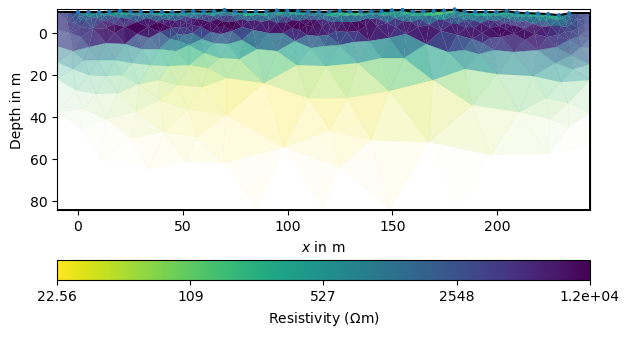

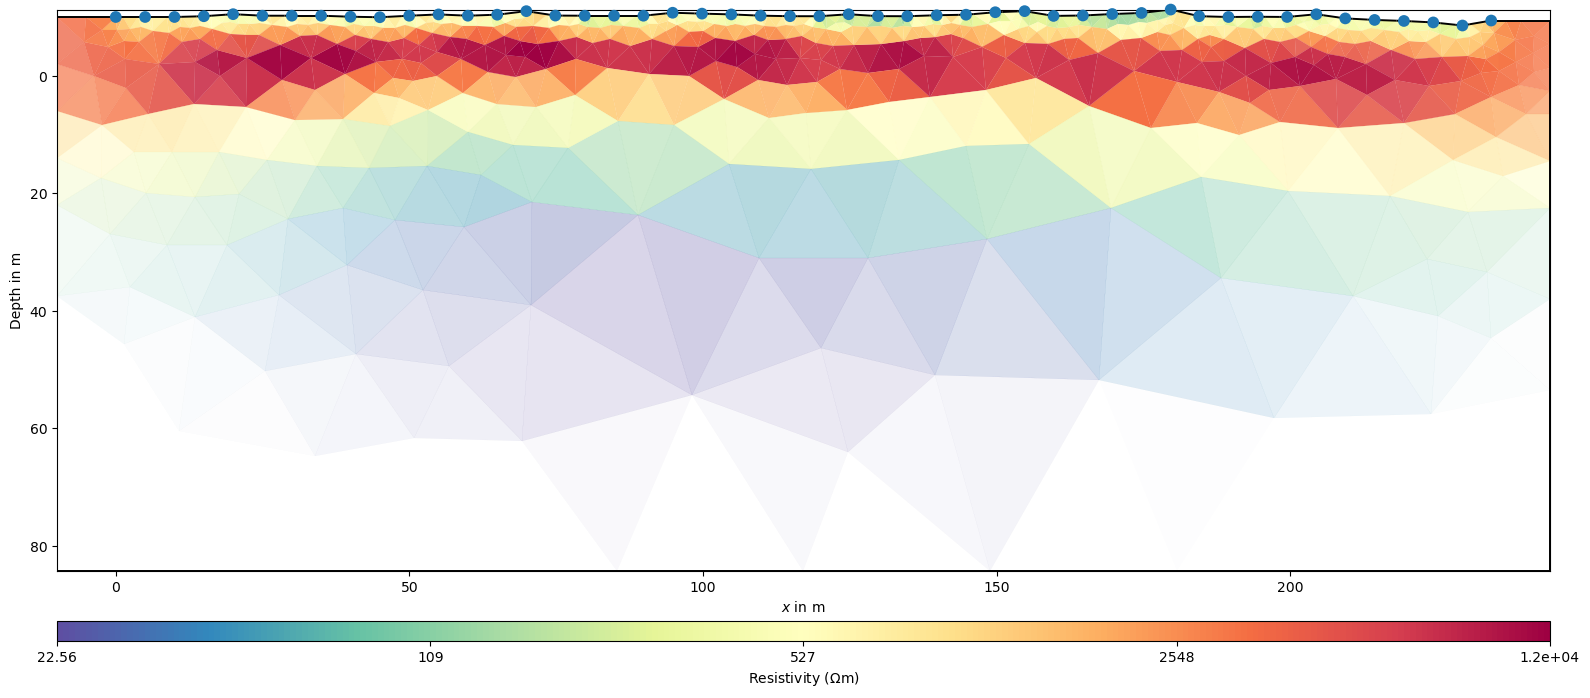

In [16]:
mgr.showResult(cMap="viridis_r", logScale=True)
mgr.saveResult(dir+ 'pygimli/all_inversions/ERTManager_western_perpendicular/')

20/12/24 - 15:13:12 - pyGIMLi - INFO - Found 2 regions.
20/12/24 - 15:13:12 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
20/12/24 - 15:13:12 - pyGIMLi - INFO - Found 2 regions.
20/12/24 - 15:13:12 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
20/12/24 - 15:13:12 - pyGIMLi - INFO - Creating forward mesh from region infos.
20/12/24 - 15:13:12 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
20/12/24 - 15:13:13 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2575 Cells: 4792 Boundaries: 3772
20/12/24 - 15:13:13 - pyGIMLi - INFO - Use median(data values)=1291.2
20/12/24 - 15:13:13 - pyGIMLi - INFO - Created startmodel from forward operator: 962, min/max=1291.200000/1291.200000
20/12/24 - 15:13:13 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF7CFD26B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF7CFD2A20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002BF7CFD2750>
min/max (data): 325/3273
min/max (error): 3%/3.28%
min/max (start model): 1291/1291
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  259.12
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   85.25 (dPhi = 66.08%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   45.82 (dPhi = 43.88%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.54 (dPhi = 87.29%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 4 ... 

20/12/24 - 15:13:33 - pyGIMLi - INFO - Use median(data values)=1291.2
20/12/24 - 15:13:33 - pyGIMLi - INFO - Created startmodel from forward operator: 962, min/max=1291.200000/1291.200000
20/12/24 - 15:13:33 - pyGIMLi - INFO - Starting inversion.


chi² =    2.48 (dPhi = 0.89%) lam: 10.0
################################################################################
#                Abort criterion reached: dPhi = 0.89 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF7CFD26B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF7CFD2A20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002BF7CFD2750>
min/max (data): 325/3273
min/max (error): 3%/3.28%
min/max (start model): 1291/1291
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  259.12
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   82.62 (dPhi = 66.88%) lam: 12.7
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   48.28 (dPhi = 38.26%) lam: 12.7
-----

20/12/24 - 15:13:55 - pyGIMLi - INFO - Use median(data values)=1291.2
20/12/24 - 15:13:55 - pyGIMLi - INFO - Created startmodel from forward operator: 962, min/max=1291.200000/1291.200000
20/12/24 - 15:13:55 - pyGIMLi - INFO - Starting inversion.


chi² =    2.83 (dPhi = 1.06%) lam: 12.7
################################################################################
#                Abort criterion reached: dPhi = 1.06 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF7CFD26B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF7CFD2A20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002BF7CFD2750>
min/max (data): 325/3273
min/max (error): 3%/3.28%
min/max (start model): 1291/1291
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  259.12
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   80.06 (dPhi = 67.61%) lam: 16.2
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   37.17 (dPhi = 49.27%) lam: 16.2
-----

20/12/24 - 15:14:20 - pyGIMLi - INFO - Use median(data values)=1291.2
20/12/24 - 15:14:20 - pyGIMLi - INFO - Created startmodel from forward operator: 962, min/max=1291.200000/1291.200000
20/12/24 - 15:14:20 - pyGIMLi - INFO - Starting inversion.


chi² =    3.54 (dPhi = 1.06%) lam: 16.2
################################################################################
#                Abort criterion reached: dPhi = 1.06 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF7CFD26B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF7CFD2A20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002BF7CFD2750>
min/max (data): 325/3273
min/max (error): 3%/3.28%
min/max (start model): 1291/1291
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  259.12
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   77.38 (dPhi = 68.32%) lam: 20.7
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   29.05 (dPhi = 57.18%) lam: 20.7
-----

20/12/24 - 15:14:40 - pyGIMLi - INFO - Use median(data values)=1291.2
20/12/24 - 15:14:40 - pyGIMLi - INFO - Created startmodel from forward operator: 962, min/max=1291.200000/1291.200000
20/12/24 - 15:14:40 - pyGIMLi - INFO - Starting inversion.


chi² =    4.18 (dPhi = 1.83%) lam: 20.7
################################################################################
#                Abort criterion reached: dPhi = 1.83 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF7CFD26B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF7CFD2A20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002BF7CFD2750>
min/max (data): 325/3273
min/max (error): 3%/3.28%
min/max (start model): 1291/1291
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  259.12
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   74.46 (dPhi = 69.06%) lam: 26.4
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   24.06 (dPhi = 61.54%) lam: 26.4
-----

20/12/24 - 15:15:14 - pyGIMLi - INFO - Use median(data values)=1291.2
20/12/24 - 15:15:14 - pyGIMLi - INFO - Created startmodel from forward operator: 962, min/max=1291.200000/1291.200000
20/12/24 - 15:15:14 - pyGIMLi - INFO - Starting inversion.


chi² =    4.27 (dPhi = 1.54%) lam: 26.4
################################################################################
#                Abort criterion reached: dPhi = 1.54 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF7CFD26B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF7CFD2A20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002BF7CFD2750>
min/max (data): 325/3273
min/max (error): 3%/3.28%
min/max (start model): 1291/1291
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  259.12
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   71.15 (dPhi = 69.86%) lam: 33.6
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   21.96 (dPhi = 62.37%) lam: 33.6
-----

20/12/24 - 15:15:52 - pyGIMLi - INFO - Use median(data values)=1291.2
20/12/24 - 15:15:52 - pyGIMLi - INFO - Created startmodel from forward operator: 962, min/max=1291.200000/1291.200000
20/12/24 - 15:15:52 - pyGIMLi - INFO - Starting inversion.


chi² =    5.02 (dPhi = 0.75%) lam: 33.6
################################################################################
#                Abort criterion reached: dPhi = 0.75 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF7CFD26B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF7CFD2A20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002BF7CFD2750>
min/max (data): 325/3273
min/max (error): 3%/3.28%
min/max (start model): 1291/1291
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  259.12
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   67.39 (dPhi = 70.73%) lam: 42.8
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   22.31 (dPhi = 59.97%) lam: 42.8
-----

20/12/24 - 15:16:19 - pyGIMLi - INFO - Use median(data values)=1291.2
20/12/24 - 15:16:19 - pyGIMLi - INFO - Created startmodel from forward operator: 962, min/max=1291.200000/1291.200000
20/12/24 - 15:16:19 - pyGIMLi - INFO - Starting inversion.


chi² =    6.16 (dPhi = 11.09%) lam: 42.8
--------------------------------------------------------------------------------
inv.iter 6 ... chi² =    5.94 (dPhi = 0.29%) lam: 42.8
################################################################################
#                Abort criterion reached: dPhi = 0.29 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF7CFD26B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF7CFD2A20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002BF7CFD2750>
min/max (data): 325/3273
min/max (error): 3%/3.28%
min/max (start model): 1291/1291
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  259.12
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   63.17 (dPhi = 71.67%) lam: 54.6
-----

20/12/24 - 15:16:46 - pyGIMLi - INFO - Use median(data values)=1291.2
20/12/24 - 15:16:46 - pyGIMLi - INFO - Created startmodel from forward operator: 962, min/max=1291.200000/1291.200000
20/12/24 - 15:16:46 - pyGIMLi - INFO - Starting inversion.


chi² =    6.98 (dPhi = 0.27%) lam: 54.6
################################################################################
#                Abort criterion reached: dPhi = 0.27 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF7CFD26B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF7CFD2A20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002BF7CFD2750>
min/max (data): 325/3273
min/max (error): 3%/3.28%
min/max (start model): 1291/1291
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  259.12
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   58.55 (dPhi = 72.65%) lam: 69.5
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   28.26 (dPhi = 47.21%) lam: 69.5
-----

20/12/24 - 15:17:22 - pyGIMLi - INFO - Use median(data values)=1291.2
20/12/24 - 15:17:22 - pyGIMLi - INFO - Created startmodel from forward operator: 962, min/max=1291.200000/1291.200000
20/12/24 - 15:17:22 - pyGIMLi - INFO - Starting inversion.


chi² =    8.66 (dPhi = 1.71%) lam: 69.5
################################################################################
#                Abort criterion reached: dPhi = 1.71 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF7CFD26B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF7CFD2A20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002BF7CFD2750>
min/max (data): 325/3273
min/max (error): 3%/3.28%
min/max (start model): 1291/1291
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  259.12
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   53.64 (dPhi = 73.62%) lam: 88.6
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   32.66 (dPhi = 38.03%) lam: 88.6
-----

20/12/24 - 15:17:49 - pyGIMLi - INFO - Use median(data values)=1291.2
20/12/24 - 15:17:49 - pyGIMLi - INFO - Created startmodel from forward operator: 962, min/max=1291.200000/1291.200000
20/12/24 - 15:17:49 - pyGIMLi - INFO - Starting inversion.


chi² =    9.34 (dPhi = 4.14%) lam: 88.6
--------------------------------------------------------------------------------
inv.iter 7 ... chi² =    9.89 (dPhi = 1.02%) lam: 88.6
################################################################################
#                Abort criterion reached: dPhi = 1.02 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF7CFD26B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF7CFD2A20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002BF7CFD2750>
min/max (data): 325/3273
min/max (error): 3%/3.28%
min/max (start model): 1291/1291
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  259.12
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   48.65 (dPhi = 74.50%) lam: 112.9
-----

20/12/24 - 15:18:12 - pyGIMLi - INFO - Use median(data values)=1291.2
20/12/24 - 15:18:12 - pyGIMLi - INFO - Created startmodel from forward operator: 962, min/max=1291.200000/1291.200000
20/12/24 - 15:18:12 - pyGIMLi - INFO - Starting inversion.


chi² =   13.24 (dPhi = 0.81%) lam: 112.9
################################################################################
#                Abort criterion reached: dPhi = 0.81 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF7CFD26B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF7CFD2A20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002BF7CFD2750>
min/max (data): 325/3273
min/max (error): 3%/3.28%
min/max (start model): 1291/1291
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  259.12
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   43.85 (dPhi = 75.20%) lam: 143.8
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   31.09 (dPhi = 32.74%) lam: 143.8
--

20/12/24 - 15:18:34 - pyGIMLi - INFO - Use median(data values)=1291.2
20/12/24 - 15:18:34 - pyGIMLi - INFO - Created startmodel from forward operator: 962, min/max=1291.200000/1291.200000
20/12/24 - 15:18:34 - pyGIMLi - INFO - Starting inversion.


chi² =   13.65 (dPhi = 1.14%) lam: 143.8
################################################################################
#                Abort criterion reached: dPhi = 1.14 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF7CFD26B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF7CFD2A20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002BF7CFD2750>
min/max (data): 325/3273
min/max (error): 3%/3.28%
min/max (start model): 1291/1291
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  259.12
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   39.59 (dPhi = 75.62%) lam: 183.3
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   30.91 (dPhi = 28.28%) lam: 183.3
--

20/12/24 - 15:18:53 - pyGIMLi - INFO - Use median(data values)=1291.2
20/12/24 - 15:18:53 - pyGIMLi - INFO - Created startmodel from forward operator: 962, min/max=1291.200000/1291.200000
20/12/24 - 15:18:53 - pyGIMLi - INFO - Starting inversion.


chi² =   16.61 (dPhi = 0.40%) lam: 183.3
################################################################################
#                 Abort criterion reached: dPhi = 0.4 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF7CFD26B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF7CFD2A20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002BF7CFD2750>
min/max (data): 325/3273
min/max (error): 3%/3.28%
min/max (start model): 1291/1291
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  259.12
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   36.21 (dPhi = 75.68%) lam: 233.6
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   31.10 (dPhi = 23.63%) lam: 233.6
--

20/12/24 - 15:19:14 - pyGIMLi - INFO - Use median(data values)=1291.2
20/12/24 - 15:19:14 - pyGIMLi - INFO - Created startmodel from forward operator: 962, min/max=1291.200000/1291.200000
20/12/24 - 15:19:14 - pyGIMLi - INFO - Starting inversion.


chi² =   20.40 (dPhi = 0.13%) lam: 233.6
################################################################################
#                Abort criterion reached: dPhi = 0.13 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF7CFD26B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF7CFD2A20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002BF7CFD2750>
min/max (data): 325/3273
min/max (error): 3%/3.28%
min/max (start model): 1291/1291
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  259.12
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   34.06 (dPhi = 75.28%) lam: 297.6
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   32.08 (dPhi = 19.52%) lam: 297.6
--

20/12/24 - 15:19:41 - pyGIMLi - INFO - Use median(data values)=1291.2
20/12/24 - 15:19:41 - pyGIMLi - INFO - Created startmodel from forward operator: 962, min/max=1291.200000/1291.200000
20/12/24 - 15:19:41 - pyGIMLi - INFO - Starting inversion.


chi² =   24.46 (dPhi = 10.58%) lam: 297.6
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   23.87 (dPhi = 0.30%) lam: 297.6
################################################################################
#                 Abort criterion reached: dPhi = 0.3 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF7CFD26B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF7CFD2A20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002BF7CFD2750>
min/max (data): 325/3273
min/max (error): 3%/3.28%
min/max (start model): 1291/1291
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  259.12
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   33.40 (dPhi = 74.41%) lam: 379.3
--

20/12/24 - 15:19:58 - pyGIMLi - INFO - Use median(data values)=1291.2
20/12/24 - 15:19:58 - pyGIMLi - INFO - Created startmodel from forward operator: 962, min/max=1291.200000/1291.200000
20/12/24 - 15:19:58 - pyGIMLi - INFO - Starting inversion.


chi² =   29.11 (dPhi = 6.41%) lam: 379.3
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   27.83 (dPhi = 0.44%) lam: 379.3
################################################################################
#                Abort criterion reached: dPhi = 0.44 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF7CFD26B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF7CFD2A20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002BF7CFD2750>
min/max (data): 325/3273
min/max (error): 3%/3.28%
min/max (start model): 1291/1291
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  259.12
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   34.38 (dPhi = 73.06%) lam: 483.3
---

20/12/24 - 15:20:16 - pyGIMLi - INFO - Use median(data values)=1291.2
20/12/24 - 15:20:17 - pyGIMLi - INFO - Created startmodel from forward operator: 962, min/max=1291.200000/1291.200000
20/12/24 - 15:20:17 - pyGIMLi - INFO - Starting inversion.


chi² =   33.76 (dPhi = 3.51%) lam: 483.3
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   32.60 (dPhi = 0.37%) lam: 483.3
################################################################################
#                Abort criterion reached: dPhi = 0.37 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF7CFD26B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF7CFD2A20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002BF7CFD2750>
min/max (data): 325/3273
min/max (error): 3%/3.28%
min/max (start model): 1291/1291
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  259.12
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   39.31 (dPhi = 72.07%) lam: 615.8
---

20/12/24 - 15:20:32 - pyGIMLi - INFO - Use median(data values)=1291.2
20/12/24 - 15:20:32 - pyGIMLi - INFO - Created startmodel from forward operator: 962, min/max=1291.200000/1291.200000
20/12/24 - 15:20:32 - pyGIMLi - INFO - Starting inversion.


chi² =   38.31 (dPhi = 1.58%) lam: 615.8
################################################################################
#                Abort criterion reached: dPhi = 1.58 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF7CFD26B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF7CFD2A20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002BF7CFD2750>
min/max (data): 325/3273
min/max (error): 3%/3.28%
min/max (start model): 1291/1291
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  259.12
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   44.43 (dPhi = 69.91%) lam: 784.8
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   46.17 (dPhi = 6.36%) lam: 784.8
---

20/12/24 - 15:20:47 - pyGIMLi - INFO - Use median(data values)=1291.2
20/12/24 - 15:20:47 - pyGIMLi - INFO - Created startmodel from forward operator: 962, min/max=1291.200000/1291.200000
20/12/24 - 15:20:47 - pyGIMLi - INFO - Starting inversion.


chi² =   43.97 (dPhi = 0.82%) lam: 784.8
################################################################################
#                Abort criterion reached: dPhi = 0.82 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BF7CFD26B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BF7CFD2A20>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002BF7CFD2750>
min/max (data): 325/3273
min/max (error): 3%/3.28%
min/max (start model): 1291/1291
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  259.12
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   50.35 (dPhi = 67.36%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   51.74 (dPhi = 4.85%) lam: 1000.0
-

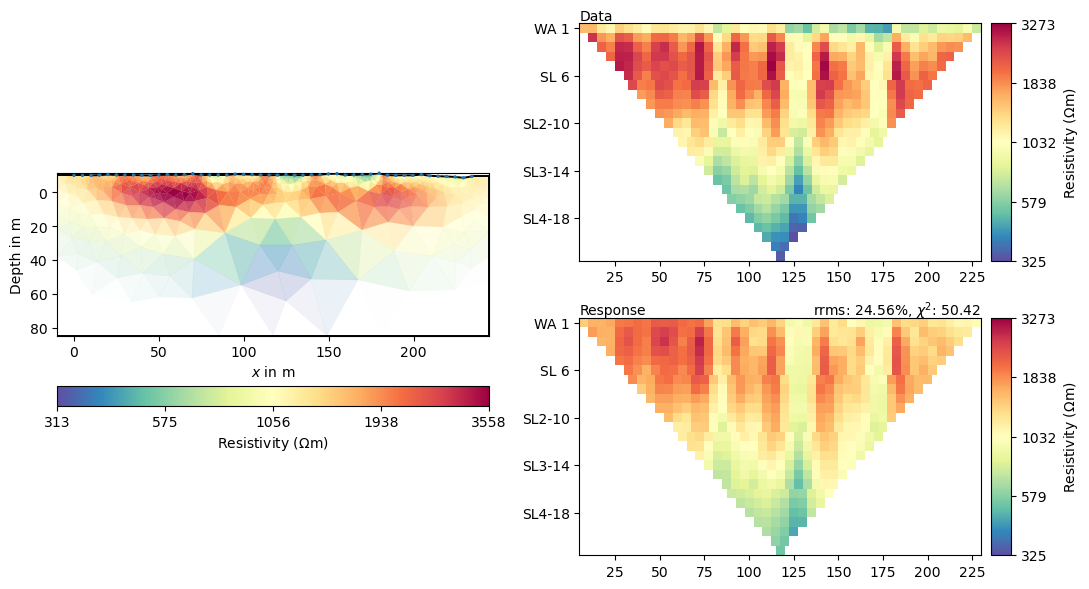

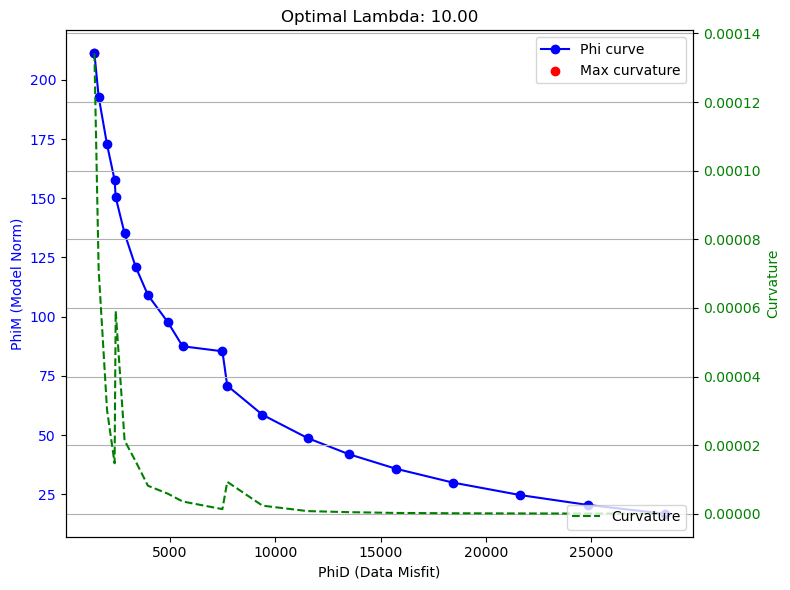

In [7]:

lambdas = np.logspace(1, 3, 20)
phiD = []
phiM = []
for lam in lambdas:
    mgr.invert(data, lam=lam, verbose=True, paraDX = 0.25, paraDZ= 0.25)
    phiD.append(mgr.inv.phiData())
    phiM.append(mgr.inv.phiModel())


mgr.showResultAndFit()

phiD = np.array(phiD)
phiM = np.array(phiM)
dphiD = np.gradient(phiD, lambdas)  # First derivative of phiD w.r.t. lambdas
dphiM = np.gradient(phiM, lambdas)  # First derivative of phiM w.r.t. lambdas
ddphiD = np.gradient(dphiD, lambdas)  # Second derivative of phiD
ddphiM = np.gradient(dphiM, lambdas)  # Second derivative of phiM

# Compute curvature
curvature = np.abs(dphiD * ddphiM - dphiM * ddphiD) / (dphiD**2 + dphiM**2)**1.5

# Find maximum curvature
max_curvature_index = np.argmax(curvature)
optimal_lambda = lambdas[max_curvature_index]

# Plot Phi curve and curvature
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Phi curve
ax1.plot(phiD, phiM, '-o', label='Phi curve', color='blue')
ax1.scatter(phiD[max_curvature_index], phiM[max_curvature_index], color='red', label='Max curvature')
ax1.set_xlabel('PhiD (Data Misfit)')
ax1.set_ylabel('PhiM (Model Norm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper right')

# Add curvature plot on secondary axis
ax2 = ax1.twinx()
ax2.plot(phiD, curvature, '--', label='Curvature', color='green')
ax2.set_ylabel('Curvature', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='lower right')

plt.title(f'Optimal Lambda: {optimal_lambda:.2f}')
plt.grid()
plt.tight_layout()
plt.show()

(-50.0, 12.284568364548335)

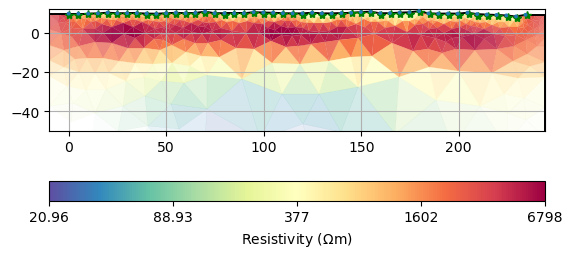

In [11]:


AL = np.loadtxt(dir + "pygimli/AL_western_parallel_to_shore.txt")
cMin=10
cMax=10000
x_AL = AL[:, 0]
z_AL = AL[:, 1]

ax, cb = mgr.showResult()
#ax.plot(ibpt_x, ibpt_depth_smoothed, ":", linewidth=1, color='black')
ax.plot(x_AL, z_AL, 'g*', linewidth=0.5, cMap="viridis_r")
ax.grid(True)
ax.set_ylim(-50)